<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/Prediction_of_profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [28]:
df=pd.read_csv('/content/online1.csv')
df

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [29]:
df.shape

(50, 5)

In [30]:
df.isnull().sum()

,0
Marketing Spend,0
Administration,0
Transport,0
Area,0
Profit,0


In [31]:
df = pd.get_dummies(df, columns=["Area"], drop_first=True)

In [32]:
X = df.drop(columns=["Profit"])  # Independent variables
y = df["Profit"]

In [33]:
X

,Marketing Spend,Administration,Transport,Area_Dhaka,Area_Rangpur
0,114523.61,136897.80,471784.10,True,False
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,False,True
3,144372.41,118671.85,383199.62,True,False
4,142107.34,91391.77,366168.42,False,True
5,131876.90,99814.71,362861.36,True,False
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,False,True
8,120542.52,148718.95,311613.29,True,False
9,123334.88,108679.17,304981.62,False,False


In [34]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [39]:
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.8390
Mean Absolute Error (MAE): 9232.73
Root Mean Squared Error (RMSE): 11418.88


In [40]:
y_pred

array([127493.87822502,  84215.82430055,  91461.57151597,  43319.81525396,
       131483.05795152,  42051.47018361, 104559.99574178,  98910.56412629,
        89643.08462155, 100498.23170595])

In [41]:
y_test

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [46]:
comparison_df = pd.DataFrame({"Actual Profit": y_test, "Predicted Profit": y_pred})
output_file_path = "/content/predicted_vs_actual_profit.csv"
comparison_df.to_csv(output_file_path, index=False)

print(f"CSV file saved: {output_file_path}")

CSV file saved: /content/predicted_vs_actual_profit.csv


In [47]:
df1=pd.read_csv('/content/predicted_vs_actual_profit.csv')
df1

,Actual Profit,Predicted Profit
0,134307.35,127493.878225
1,81005.76,84215.824301
2,99937.59,91461.571516
3,64926.08,43319.815254
4,125370.37,131483.057952
5,35673.41,42051.470184
6,105733.54,104559.995742
7,107404.34,98910.564126
8,97427.84,89643.084622
9,122776.86,100498.231706


In [49]:
# Predict profit for the training data
y_train_pred = model.predict(X_train)

# Create a DataFrame with actual and predicted training data profits
train_comparison_df = pd.DataFrame({"Actual Profit (Train)": y_train, "Predicted Profit (Train)": y_train_pred})

# Save to CSV
train_output_file_path = "/content/predicted_vs_actual_train_profit.csv"
train_comparison_df.to_csv(train_output_file_path, index=False)

print(f"CSV file for training data saved: {train_output_file_path}")


CSV file for training data saved: /content/predicted_vs_actual_train_profit.csv


In [50]:
df2=pd.read_csv('/content/predicted_vs_actual_train_profit.csv')
df2

,Actual Profit (Train),Predicted Profit (Train)
0,141585.52,127231.980427
1,166187.94,169579.297243
2,89949.14,89543.705654
3,152211.77,151433.626666
4,182901.99,173495.426102
5,156122.51,144769.266696
6,77798.83,74994.439850
7,49490.75,69595.600782
8,42559.73,43204.448922
9,129917.04,176553.037353


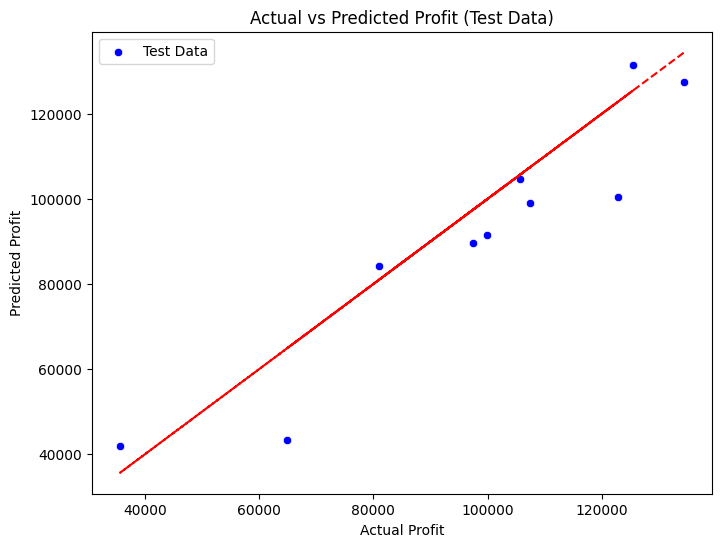

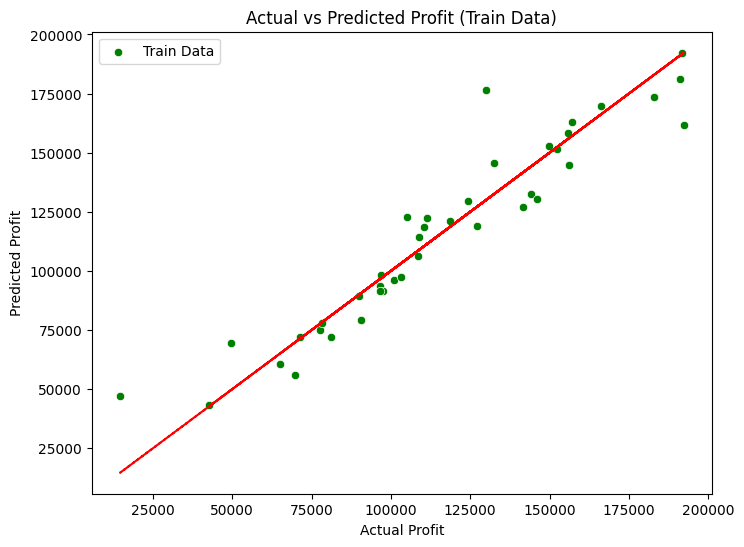

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for testing data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Test Data")
plt.plot(y_test, y_test, color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Test Data)")
plt.legend()
plt.show()

# Scatter plot for training data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, color="green", label="Train Data")
plt.plot(y_train, y_train, color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Train Data)")
plt.legend()
plt.show()


In [52]:
# Get the accuracy score of the model
train_score = model.score(X_train, y_train)  # Accuracy on training data
test_score = model.score(X_test, y_test)  # Accuracy on test data

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")


Training Accuracy: 0.8999
Testing Accuracy: 0.8390
